# 1 - Introduction

### Name : Hedy Fernando
### Batch : 001-HCK
### Data-Set : Coffe Bean Image
### Objective : Create the model Computer Vision for image classifications of rosted coffe bean

# 2 - Import Library

In [319]:
# Import Library

import os
import pandas as pd
import numpy as np
import PIL
import pathlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.preprocessing import image

import glob

# Callbacks 
from keras.callbacks import ModelCheckpoint

# Setting Seed
import random
np.random.seed(24)
tf.random.set_seed(24)

# ignore warningsetting 
import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

### Adding image with augmentation

In [182]:
# # upload files
# !mkdir -p data/test/Dark data/test/Green data/test/Light data/test/Medium

In [207]:
# # Folder will bi augmentation
# dt = './train/'

In [209]:
# # Preparation data to configure for adding new data

# save_to = './data/test/'
# target_size = (100,100)
# batch_size = 32

# train_datagen = ImageDataGenerator(
#     validation_split = 0.2,
#     rescale = 1./255,
#     shear_range = 0.2,
#     zoom_range = 0.2,
#     horizontal_flip = True
# )

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     dt,
#     target_size = target_size,
#     batch_size = batch_size,
#     class_mode = 'categorical',
#     subset = 'training',
#     save_to_dir = save_to,
# )

# validation_generator = test_datagen.flow_from_directory(
#     dt,
#     target_size = target_size,
#     batch_size = batch_size,
#     class_mode = 'categorical',
#     subset = 'validation'
# )

Found 960 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [154]:
# # Create new image

# for i in range(0,200):
#     x, y = next(train_generator)

Tthe code above serves as the addition of a new image from the existing image in the data train. The data is changed to the specifications that have been set and will be entered into the folder that we have prepared. The total number of images added is 6480, the new image will be used as test and inference data.Because the code will add a new image then the code is disabled.

In [210]:
# Open Image Folder

train_folder = r'train/'
val_folder = r'val/'
test_folder = r'test/'

In [512]:
# Create path to folder

tr_dir = pathlib.Path(train_folder)
val_dir = pathlib.Path(val_folder)
ts_dir = pathlib.Path(test_folder)
imgtr_count = len(list(tr_dir.glob('*/*.png')))
imgval_count = len(list(val_dir.glob('*/*.png')))
imgts_count = len(list(ts_dir.glob('*/*.png')))

print('Train Image:',imgtr_count)
print('Val Image:',imgval_count)

Train Image: 1200
Val Image: 400


In [213]:
# Create list for every class data

dark = list(tr_dir.glob('Dark/*'))
green = list(tr_dir.glob('Green/*'))
light = list(tr_dir.glob('Light/*'))
medium = list(tr_dir.glob('Medium/*'))

# 4 - Exploratory Data Analysis (EDA)

In [214]:
# Setting image height, width and batch size

img_width = 100
img_height = 100
batch_size = 4

In [216]:
# Train dataset configuration

tr_dataset = tf.keras.utils.image_dataset_from_directory(
    train_folder,
    shuffle=True,
    batch_size=batch_size,
    image_size=(img_height,img_width))

Found 1200 files belonging to 4 classes.


In [217]:
# Validation dataset configuration

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_folder,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 400 files belonging to 4 classes.


In [218]:
# Test dataset configuration

ts_dataset = tf.keras.utils.image_dataset_from_directory(
    test_folder,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 400 files belonging to 4 classes.


In [219]:
# Class name identify
class_name = tr_dataset.class_names
print(class_name)

['Dark', 'Green', 'Light', 'Medium']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

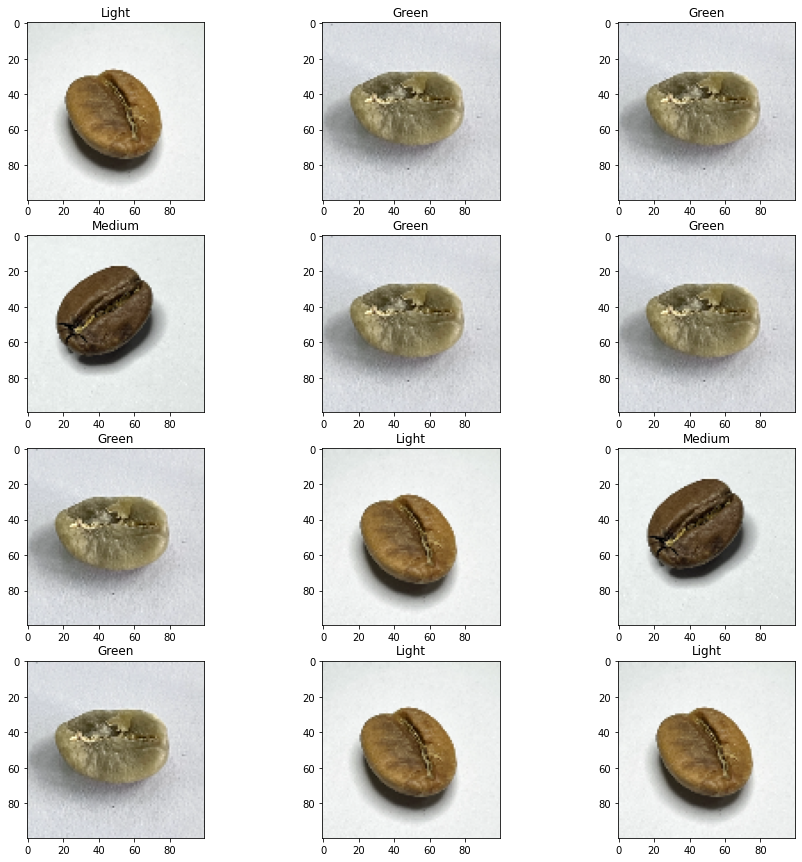

In [221]:
# Setting subplot for dataset images
fig,ax=plt.subplots(4,3)
fig.set_size_inches(15,15)
for img_bean in tr_dataset:
    x_batch, y_batch = img_bean
    for i in range (0,4):
        for j in range(3):
            random_example = np.random.randint(0, batch_size)
            ax[i,j].imshow(x_batch[random_example]/250)
            ax[i,j].set_title(tr_dataset.class_names[y_batch[random_example].numpy()])
    break

In [222]:
# Check size of train dataset

for image_batch, label_batch in tr_dataset:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(4, 100, 100, 3)
(4,)


Image data consists of 4 classes, namely dark, green, light, medium. The image in the photo from various sides is 244x244 and has been rescaled to 100x100. The total image data is 1600 and 400 images have been added from the augmentation data for the test data. The coffee bean image above is different by its color.

# 5 - Data Preprocessing

In [225]:
# Configure dataset for performance

autotune = tf.data.AUTOTUNE

tr_ds = tr_dataset.cache().shuffle(1000).prefetch(buffer_size=autotune)
val_ds = val_dataset.cache().prefetch(buffer_size=autotune)
test_ds = ts_dataset.cache().prefetch(buffer_size=autotune)

In [226]:
# Standardize the data with rescaling

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [228]:
normalized_dataset = tr_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, label_batch = next(iter(normalized_dataset))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.9728629


# 6 - Model Definition

In [229]:
# Create the model

num_classes = 4

model = Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
])

In [230]:
# Compile model
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [231]:
# Setting Model Checkpoint

checkpoint_filepath = 'model_point/checkpoint'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor = 'val_accuracy',
    save_best_only = True,
    save_weights_only = True,
    mode = 'auto',
    save_freq='epoch',
)

In [232]:
# Model summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 64)      

# 7 - Model Training

In [233]:
# Fit model and training

epoch = 15

history = model.fit(
    tr_dataset,
    validation_data=val_dataset,
    epochs=epoch,
    callbacks=[model_checkpoint]
)

Epoch 1/15
300/300 [==============================] - 4s 13ms/step - loss: 3.0627 - accuracy: 0.8250 - val_loss: 0.5344 - val_accuracy: 0.8250
Epoch 2/15
300/300 [==============================] - 4s 12ms/step - loss: 0.3254 - accuracy: 0.9092 - val_loss: 0.1427 - val_accuracy: 0.9625
Epoch 3/15
300/300 [==============================] - 5s 15ms/step - loss: 0.2441 - accuracy: 0.9483 - val_loss: 0.2265 - val_accuracy: 0.9425
Epoch 4/15
300/300 [==============================] - 4s 12ms/step - loss: 0.2142 - accuracy: 0.9467 - val_loss: 0.1346 - val_accuracy: 0.9575
Epoch 5/15
300/300 [==============================] - 4s 12ms/step - loss: 0.0984 - accuracy: 0.9683 - val_loss: 0.1337 - val_accuracy: 0.9500
Epoch 6/15
300/300 [==============================] - 4s 13ms/step - loss: 0.1112 - accuracy: 0.9667 - val_loss: 0.0103 - val_accuracy: 0.9975
Epoch 7/15
300/300 [==============================] - 8s 27ms/step - loss: 0.0495 - accuracy: 0.9817 - val_loss: 0.0272 - val_accuracy: 0.9850

# 8 - Model Evaluation

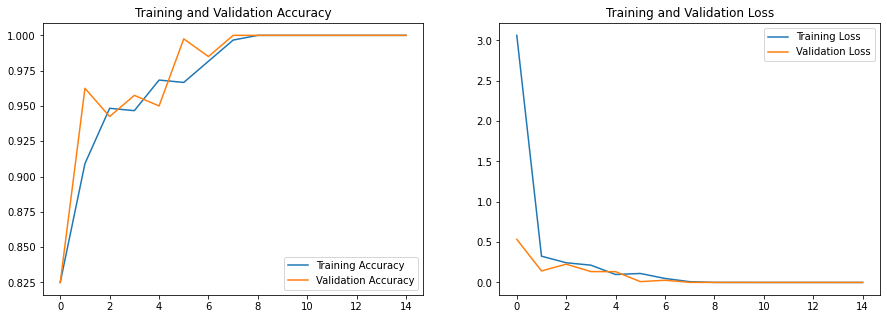

In [234]:
# Create plot model evaluation

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The results shown from the graph are very good from the basic model, where accuracy reaches 100% and loss is reduced to 0.3-0.4. This shows that the model works well in classifying coffee bean data

# Model Improvement

In [568]:
# model improved architechture
# Create the model

num_classes = 4

model_improved = Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_initializer='glorot_uniform'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='glorot_uniform'),
    layers.Dropout(0.15),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='glorot_uniform'),
    layers.Dropout(0.20),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
])

In [569]:
# setting optimizer

opt = tf.keras.optimizers.Adam(
    learning_rate=0.0001
)

In the improvement model we try to remove some neurons to reduce overfitting. Using kernel glorot to reduce explode on the model. The layer values that we use follow binary or ram numbers from small to large numbers. We also reduce the learning rate so that the learning model takes a little longer to avoid missed learning for maximum results.

In [570]:
# Model compiling
model_improved.compile(
    optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

In [571]:
# Setting Model Checkpoint

checkpoint_filepath = 'model_point/checkpoint2'
model_checkpoint2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor = 'val_accuracy',
    save_best_only = True,
    save_weights_only = True,
    mode = 'auto',
    save_freq='epoch',
)

In [572]:
# Model summary
model_improved.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 dropout_12 (Dropout)        (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 dropout_13 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                

In [573]:
# Training the model
history_improved = model_improved.fit(
    tr_dataset, 
    validation_data=val_dataset, 
    epochs=15, 
    callbacks=[model_checkpoint2], 
    batch_size=batch_size
)

Epoch 1/15
300/300 [==============================] - 5s 16ms/step - loss: 8.3461 - accuracy: 0.6158 - val_loss: 0.5279 - val_accuracy: 0.8325
Epoch 2/15
300/300 [==============================] - 5s 18ms/step - loss: 1.3112 - accuracy: 0.8392 - val_loss: 0.2631 - val_accuracy: 0.9075
Epoch 3/15
300/300 [==============================] - 5s 16ms/step - loss: 0.5915 - accuracy: 0.9117 - val_loss: 0.0971 - val_accuracy: 0.9675
Epoch 4/15
300/300 [==============================] - 7s 22ms/step - loss: 0.3007 - accuracy: 0.9492 - val_loss: 0.0566 - val_accuracy: 0.9875
Epoch 5/15
300/300 [==============================] - 17s 55ms/step - loss: 0.2824 - accuracy: 0.9450 - val_loss: 0.0407 - val_accuracy: 0.9725
Epoch 6/15
300/300 [==============================] - 5s 16ms/step - loss: 0.2007 - accuracy: 0.9583 - val_loss: 0.6001 - val_accuracy: 0.8025
Epoch 7/15
300/300 [==============================] - 5s 17ms/step - loss: 0.1611 - accuracy: 0.9700 - val_loss: 0.0260 - val_accuracy: 0.995

In [574]:
# Model Improved load model checkpoint

model_improved.load_weights(checkpoint_filepath)

## Model Improvement Evaluation

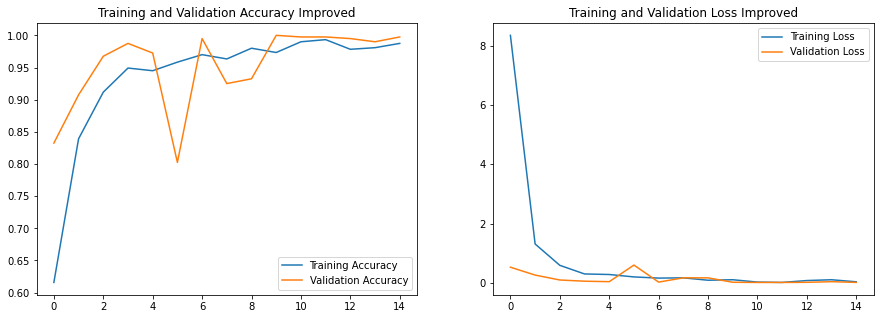

In [575]:
# Create plot model evaluation

acc = history_improved.history['accuracy']
val_acc = history_improved.history['val_accuracy']

loss = history_improved.history['loss']
val_loss = history_improved.history['val_loss']

epochs_range = history_improved.epoch

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Improved')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Improved')
plt.show()

The improvement model also shows good results. Although the accuracy is reduced even if only slightly, the loss is smaller than our basic model. This improvement model can also be used as a consideration for use in predicting rosted coffee bean data.

# 9 - Model Saving

In [580]:
# Model saving
model.save('model_coffe.h5')
model_improved.save('model_improved_coffe.h5')
np.save('history_model.npy', history.history)
np.save('history_improved_model.npy', history_improved.history)

## Model Evaluation with Data Test

In [589]:
# Importing saved model
path = '../Milestone2_Phase_2/'
history_loaded = np.load(path + 'history_improved_model.npy', allow_pickle='TRUE').item()
model_loaded = load_model(path + "model_improved_coffe.h5")

In [590]:
# Get images for testing data into list
list_files = []
list_category = []
test_dir = ts_dir
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        list_files.append(os.path.join(dirname, filename))
        list_category.append(filename.split('.png')[0])

In [591]:
# Model prediction
classes = tr_dataset.class_names
pred = pd.DataFrame()
pred['y_label'] = list_category
pred['y_pred'] = np.nan
i = 0
for img_path in list_files:
    new_img = image.load_img(img_path, target_size=(100, 100))
    img = image.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    prediction = np.argmax(model_loaded.predict(img))
    class_pred = classes[prediction]
  
    pred.loc[i, 'y_pred'] = class_pred
    i = i + 1
    if i==1:# getting a second example
        img2 = img
    if i==4:# getting a second example
        img3 = img

1/1 [==============================] - 0s 13ms/step


In [592]:
# Prediction result
print(pred)

        y_label  y_pred
0     green (7)   Green
1     green (4)   Green
2    green (10)   Green
3     green (8)   Green
4     green (5)   Green
5     green (6)   Green
6     green (1)   Green
7     green (3)   Green
8     green (2)   Green
9     green (9)   Green
10   medium (4)  Medium
11   medium (7)  Medium
12  medium (10)  Medium
13   medium (8)  Medium
14   medium (9)  Medium
15   medium (3)  Medium
16   medium (1)  Medium
17   medium (2)  Medium
18   medium (6)  Medium
19   medium (5)  Medium
20    light (7)   Light
21    light (6)   Light
22    light (4)   Light
23    light (9)   Light
24    light (1)   Light
25   light (10)   Light
26    light (5)   Light
27    light (3)   Light
28    light (2)   Light
29    light (8)   Light
30     dark (6)    Dark
31     dark (5)    Dark
32    dark (10)    Dark
33     dark (7)    Dark
34     dark (1)    Dark
35     dark (9)    Dark
36     dark (2)  Medium
37     dark (3)    Dark
38     dark (4)    Dark
39     dark (8)    Dark


From the prediction results of some test data, the model works very well. There are some mistakes in guessing almost similar images, such as medium with dark and light with green. This can be influenced by the brightness of the image which is almost the same or the color of the two is closes. But in the Improvement model, the model can distinguish between light and green very well. Prediction errors only occur between dark and medium data.

# 10 - Model Inference

In [599]:
# Defining testing image
image_inference = '../Milestone2_Phase_2/inference/green_test.png'

# Image predict
img = keras.preprocessing.image.load_img(
    image_inference, target_size=(img_height, img_width)
)

1/1 [==============================] - 0s 13ms/step
This image most likely belongs to Green with a 95.93 percent confidence.


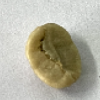

In [600]:
# Image manipulation
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


# Image predicting
predictions = model_improved.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Showing the result
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(str(image_inference))

When trying to use new data, the model can predict with a percentage above 80%. This is very good for the model's performance in determining the rosted of coffee beans.

# 11 - Conclusions

We have 4 levels of roasted coffee beans which means our data has 4 classes. Our total data is only 1600, because we do very little image augmentation to add new data by changing the size, horizontal flip, zoom range, shear range. The data that has been created will be used as test and inference data as well as back up data. We change the image size which was originally 244x244 to 100x100 to ease the model's performance in processing images.

The model we are training shows very good results where the accuracy reaches 90%. After improvement, the model works better where the model can distinguish a thin difference between green and light classes. When trying the model with inference data, the model succeeded in predicting the image and guessing the class of the coffee bean image correctly and with confidence above 80%.

From the results of making a computer vision model to classify roasted bean coffee, we can conclude that both the basic model and the improvement model can be used in the application. But in this case, we will use the improvement model because the model results are better.